# Testing neural networks approach to numerical integration on 2d integral

## Definition

\begin{equation}
    \int_{0}^{1}d\alpha\{\alpha^{a}(1 - \alpha)^b\}\int_{0}^{\infty}dt\{\frac{t^m}{(1+t)^n}F[z_{0}]\} \equiv I(a, b, m, n; F[z_{0}])  \tag{1}
\end{equation}
\begin{equation}   
    F[z_0] = \exp[-2z_0]  \tag{2}
\end{equation}
\begin{equation} 
    z_0 = tD + \frac{t}{1 + t}R^2  \tag{3}
\end{equation}
\begin{equation}     
    D = \alpha_1(b_1^{2}P^2 + m_1^2) + \alpha_2(b_2^{2}P^2 + m_2^2)  \tag{4}
\end{equation}
\begin{equation} 
        R^2 = (\alpha_1^{2}b_1^2 + \alpha_2^{2}b_2^2 + 2\alpha_{1}\alpha_{2}b_{1}b_2)P^2  \tag{5}
\end{equation}
\begin{equation} 
    b_1 = -\frac{m_1}{m_1 + m_2}  \tag{6}
\end{equation}
\begin{equation} 
    b_2 = \frac{m_2}{m_1 + m_2}  \tag{7}
\end{equation}
\begin{equation}
    \alpha_1 = \alpha, \alpha_2 = 1 - \alpha \tag{8}
\end{equation}
\begin{equation} 
    m_1 = m_2 = 0.7083333, P^2 = -1.665046  \tag{9}
\end{equation}

Iterated integral can be interpreted as a double integral:

\begin{equation}
    \label{eq:iterated-as-double}
     \int_{0}^{1} \alpha^{a}(1 - \alpha)^bd\alpha \int_{0}^{\infty}\frac{t^m}{(1+t)^n}F[z_{0}]dt = 
     \int_{0}^{1} \int_{0}^{\infty} dtd\alpha \frac{t^m}{(1+t)^n}F[z_{0}]\alpha^{a}(1 - \alpha)^b, \tag{10}
\end{equation}

## Library import

In [16]:
%run ../skuld/skuld.py      # skuld NNI library
%run ../utils/plots.py      # plotting functions
%run ../utils/integrate.py  # 'classic' numerical integration function

import plotly.graph_objects as go
import skuld
import plots

In [17]:
import numpy as np
from scipy.integrate import quad

# Global variables (Fortran COMMON blocks)
la = 2.4
m1 = 1.7 / la
m2 = 1.7 / la
PP = -(3.09688 / la) ** 2
alp1 = 0.0  # Initialize alp1, will be modified within funcI21
m_, n_, k, l = 0, 0, 0, 0 # Initialize m,n,k,l, will be modified within funcI22

def funcI2(t):
    global m1, m2, PP, la, alp1, m_, n_, k, l

    b1 = -m1 / (m1 + m2)
    b2 = m2 / (m1 + m2)

    RR = (alp1**2.0 * (b1 * b1) + (1.0 - alp1)**2.0 * (b2 * b2) +
          2.0 * alp1 * (1.0 - alp1) * (b1 * b2)) * PP

    DD = alp1 * ((b1 * b1) * PP + m1 * m1) + \
         (1.0 - alp1) * ((b2 * b2) * PP + m2 * m2) - RR

    z0 = t * DD + t / (1.0 + t) * RR

    Fz0 = np.exp(-2.0 * z0)

    return (alp1**m) * (1.0 - alp1)**n * t**k / (1.0 + t)**l * Fz0

def funcI21(alp1a):
    global alp1, m_, n_, k, l

    alp1 = alp1a

    aa = 0.0
    bb = 100.0

    result, error = quad(funcI2, aa, bb, epsabs=0.001, epsrel=0.0001)

    return result

def funcI22(mm, nn, kk, ll):
    global m_, n_, k, l

    m = mm
    n = nn
    k = kk
    l = ll

    aa = 0.0
    bb = 1.0

    result, error = quad(funcI21, aa, bb, epsabs=0.001, epsrel=0.0001)

    return result

if __name__ == "__main__":
    print(f"funcI22(0,0,1,2)={funcI22(0, 0, 1, 2)}")
    print(f"funcI22(0,1,1,2)={funcI22(0, 1, 1, 2)}")
    print(f"funcI22(1,0,1,2)={funcI22(1, 0, 1, 2)}")
    print(f"funcI22(1,1,1,2)={funcI22(1, 1, 1, 2)}")

    print(f"funcI22(0,0,2,1)={funcI22(0, 0, 2, 1)}")
    print(f"funcI22(0,1,2,1)={funcI22(0, 1, 2, 1)}")
    print(f"funcI22(1,0,2,1)={funcI22(1, 0, 2, 1)}")
    print(f"funcI22(1,1,2,1)={funcI22(1, 1, 2, 1)}")

    print(f"funcI22(0,0,2,3)={funcI22(0, 0, 2, 3)}")
    print(f"funcI22(0,1,2,3)={funcI22(0, 1, 2, 3)}")
    print(f"funcI22(1,0,2,3)={funcI22(1, 0, 2, 3)}")
    print(f"funcI22(1,1,2,3)={funcI22(1, 1, 2, 3)}")

    print(f"funcI22(0,0,3,2)={funcI22(0, 0, 3, 2)}")
    print(f"funcI22(0,1,3,2)={funcI22(0, 1, 3, 2)}")
    print(f"funcI22(1,0,3,2)={funcI22(1, 0, 3, 2)}")
    print(f"funcI22(1,1,3,2)={funcI22(1, 1, 3, 2)}")

funcI22(0,0,1,2)=0.5726878630585432
funcI22(0,1,1,2)=0.2863439315572372
funcI22(1,0,1,2)=0.2863439315572372
funcI22(1,1,1,2)=0.10928422410595541
funcI22(0,0,2,1)=10.530860281015597
funcI22(0,1,2,1)=5.265430140504137
funcI22(1,0,2,1)=5.265430140504137
funcI22(1,1,2,1)=2.346892789012971
funcI22(0,0,2,3)=0.34910643894715204
funcI22(0,1,2,3)=0.17455322197156217
funcI22(1,0,2,3)=0.17455322197156217
funcI22(1,1,2,3)=0.06872974308770967
funcI22(0,0,3,2)=8.985942197652435
funcI22(0,1,3,2)=4.492971098522734
funcI22(1,0,3,2)=4.492971098522734
funcI22(1,1,3,2)=2.022713190865232


## General constants

In [18]:
la = 2.4
m1 = 1.7 / la
m2 = 1.7 / la
PP = -(3.09688 / la) ** 2

## Functions

In [19]:
def funcI2(t, alp1):

    global m1, m2, PP, a_, b_, m_, n_

    b1 = -m1 / (m1 + m2)
    b2 = m2 / (m1 + m2)

    RR = (alp1**2.0 * (b1 * b1) + (1.0 - alp1)**2.0 * (b2 * b2) +
          2.0 * alp1 * (1.0 - alp1) * (b1 * b2)) * PP

    DD = alp1 * ((b1 * b1) * PP + m1 * m1) + (1.0 - alp1) * ((b2 * b2) * PP + m2 * m2) - RR

    z0 = t * DD + t / (1.0 + t) * RR

    Fz0 = np.exp(-2.0 * z0)

    f = (alp1**a) * (1.0 - alp1)**b * t**m / (1.0 + t)**n * Fz0

    return f


def funcI2C(X):
    t = X[:, 0]
    a = X[:, 1]
    return funcI2(t, a)

## Hyperparams

In [6]:
input_size = 2
hidden_size = 30
learning_rate = 0.001
num_epochs = 5000
num_samples = 200

distribution = 'sud' # 'grid'

## $I[0, 0, 2, 1]$

In [20]:
a_ = 0
b_ = 0
m_ = 2
n_ = 1

a1 = 0.0 # t lower
b1 = 50.0000000 # t upper
a2 = 0.0000000 # α lower
b2 = 1.0 # α upper

Inputs shape: torch.Size([40000, 2])
Targets shape: torch.Size([40000, 1])


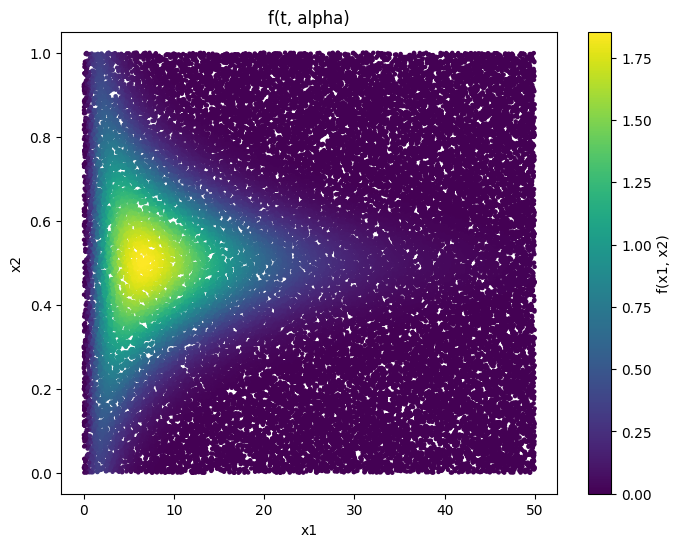

In [21]:
X_init, y_init = [], []
if distribution == 'grid':
    X_init, y_init = skuld.generate_data(funcI2C, [a1, a2], [b1, b2], num_samples, input_size)
else:
    X_init, y_init = skuld.generate_data_uniform(funcI2C, [a1, a2], [b1, b2], num_samples**2, input_size)

print("Inputs shape:", X_init.shape)
print("Targets shape:", y_init.shape)

plots.plot_2d_function_heatmap(X_init, y_init, 'f(t, alpha)')

In [22]:
if distribution == 'grid': # properly works with grid, sud requires additional dev
    t = X_init[:, 0].numpy()
    alpha = X_init[:, 1].numpy()
    f = y_init.squeeze().numpy()
    t_unique = np.unique(t)
    alpha_unique = np.unique(alpha)
    f_grid = f.reshape((num_samples, num_samples))
    fig = go.Figure(data=[go.Surface(
            x=t_unique,
            y=alpha_unique,
            z=f_grid
        )])
    fig.update_layout(
        scene=dict(
            xaxis_title='t',
            yaxis_title='α',
            zaxis_title='f',
            
        ),
        title='Function f(t, α)',
        margin=dict(l=0, r=0, b=0, t=40)
    )
    
    fig.show()

In [1]:
X, y = skuld.scale_data(X_init, y_init, n_dim=2)
x_train, x_test, y_train, y_test = skuld.split_data(X=X, y=y, test_size=0.1, shuffle=True)

plots.plot_2d_function_heatmap(X, y, 'f(t, alpha)')

NameError: name 'skuld' is not defined

In [11]:
model = skuld.init_model(input_size, hidden_size)
model.compile_default(learning_rate)
train_history = model.train(x_train, y_train, num_epochs, verbose=True)
test_loss = model.test(x_test, y_test)
print(f"Test Loss: {test_loss:.10f}")

Epoch [100/5000], Loss: 0.0433924906
Epoch [200/5000], Loss: 0.0374407880
Epoch [300/5000], Loss: 0.0335977972
Epoch [400/5000], Loss: 0.0319674276
Epoch [500/5000], Loss: 0.0315708742
Epoch [600/5000], Loss: 0.0315026827
Epoch [700/5000], Loss: 0.0314755440
Epoch [800/5000], Loss: 0.0314485133
Epoch [900/5000], Loss: 0.0314182937
Epoch [1000/5000], Loss: 0.0313839503
Epoch [1100/5000], Loss: 0.0313438773
Epoch [1200/5000], Loss: 0.0312956460
Epoch [1300/5000], Loss: 0.0312359072
Epoch [1400/5000], Loss: 0.0311600808
Epoch [1500/5000], Loss: 0.0310617499
Epoch [1600/5000], Loss: 0.0309318583
Epoch [1700/5000], Loss: 0.0307576563
Epoch [1800/5000], Loss: 0.0305216443
Epoch [1900/5000], Loss: 0.0302015655
Epoch [2000/5000], Loss: 0.0297727734
Epoch [2100/5000], Loss: 0.0292139016
Epoch [2200/5000], Loss: 0.0285152420
Epoch [2300/5000], Loss: 0.0276874490
Epoch [2400/5000], Loss: 0.0267664418
Epoch [2500/5000], Loss: 0.0258104838
Epoch [2600/5000], Loss: 0.0248884242
Epoch [2700/5000], Lo

In [12]:
nni_scaled = NeuralNumericalIntegration.integrate(model, [0, 0], [1, 1], n_dims=2)
nni_result = descale_result(float(nni_scaled[0]), X_init, y_init, frange=(0, 1), n_dim=2)
nni_scaled, nni_result

2D Integration started!


(array([mpf('0.11287742407603546')], dtype=object), 10.46544075012207)

## $I[0, 0, 1, 2]$

In [13]:
a_ = 0
b_ = 0
m_ = 1
n_ = 2

a1 = 0.0 # t lower
b1 = 15.0000000 # t upper
a2 = 0.0000000 # α lower
b2 = 1.0 # α upper

Inputs shape: torch.Size([40000, 2])
Targets shape: torch.Size([40000, 1])


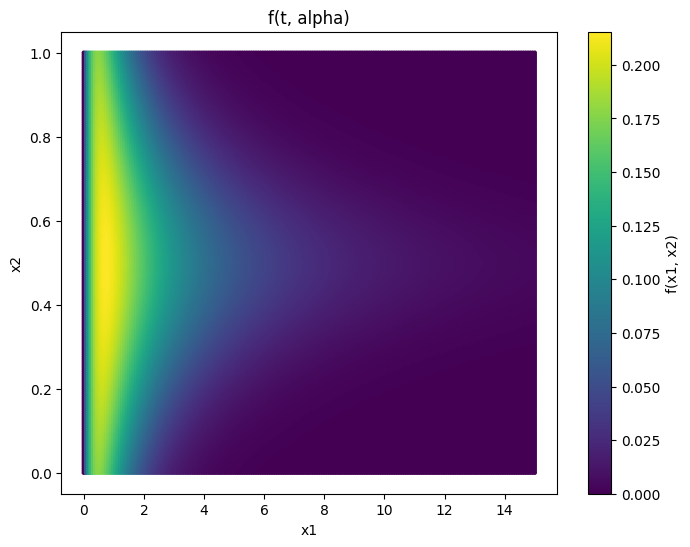

In [14]:
X_init, y_init
if distribution == 'grid':
    X_init, y_init = generate_data(funcI2C, [a1, a2], [b1, b2], num_samples, input_size)
else:
    X_init, y_init = generate_data_uniform(funcI2C, [a1, a2], [b1, b2], num_samples**2, input_size)

print("Inputs shape:", X_init.shape)
print("Targets shape:", y_init.shape)

plot_2d_function_heatmap(X_init, y_init, 'f(t, alpha)')

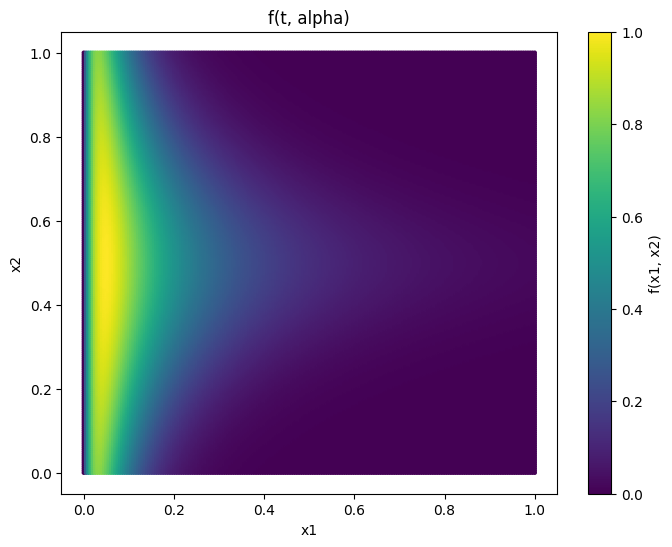

In [15]:
X, y = scale_data(X_init, y_init, n_dim=2) 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

plot_2d_function_heatmap(X, y, 'f(t, alpha)')

In [16]:
model = MLP(input_size, hidden_size)
model.compile(criterion=nn.MSELoss(), optimizer=optim.Adam(model.parameters(), lr=learning_rate))
train_history = model.train(x_train, y_train, num_epochs, verbose=True)
test_loss = model.test(x_test, y_test)
print(f"Test Loss: {test_loss:.10f}")

Epoch [100/5000], Loss: 0.0585636273
Epoch [200/5000], Loss: 0.0465756245
Epoch [300/5000], Loss: 0.0373549387
Epoch [400/5000], Loss: 0.0319937207
Epoch [500/5000], Loss: 0.0298876986
Epoch [600/5000], Loss: 0.0293210316
Epoch [700/5000], Loss: 0.0291626453
Epoch [800/5000], Loss: 0.0290615037
Epoch [900/5000], Loss: 0.0289545823
Epoch [1000/5000], Loss: 0.0288333911
Epoch [1100/5000], Loss: 0.0286955331
Epoch [1200/5000], Loss: 0.0285387039
Epoch [1300/5000], Loss: 0.0283601638
Epoch [1400/5000], Loss: 0.0281567015
Epoch [1500/5000], Loss: 0.0279245973
Epoch [1600/5000], Loss: 0.0276596434
Epoch [1700/5000], Loss: 0.0273572635
Epoch [1800/5000], Loss: 0.0270126890
Epoch [1900/5000], Loss: 0.0266212597
Epoch [2000/5000], Loss: 0.0261787921
Epoch [2100/5000], Loss: 0.0256819874
Epoch [2200/5000], Loss: 0.0251288321
Epoch [2300/5000], Loss: 0.0245189182
Epoch [2400/5000], Loss: 0.0238536242
Epoch [2500/5000], Loss: 0.0231361669
Epoch [2600/5000], Loss: 0.0223715045
Epoch [2700/5000], Lo

In [17]:
nni_scaled = NeuralNumericalIntegration.integrate(model, [0, 0], [1, 1], n_dims=2)
nni_result = descale_result(float(nni_scaled[0]), X_init, y_init, frange=(0, 1), n_dim=2)
nni_scaled, nni_result

2D Integration started!


(array([mpf('0.17357893688082876')], dtype=object), 0.5609411001205444)

## $I[0, 1, 1, 2]$

Inputs shape: torch.Size([40000, 2])
Targets shape: torch.Size([40000, 1])


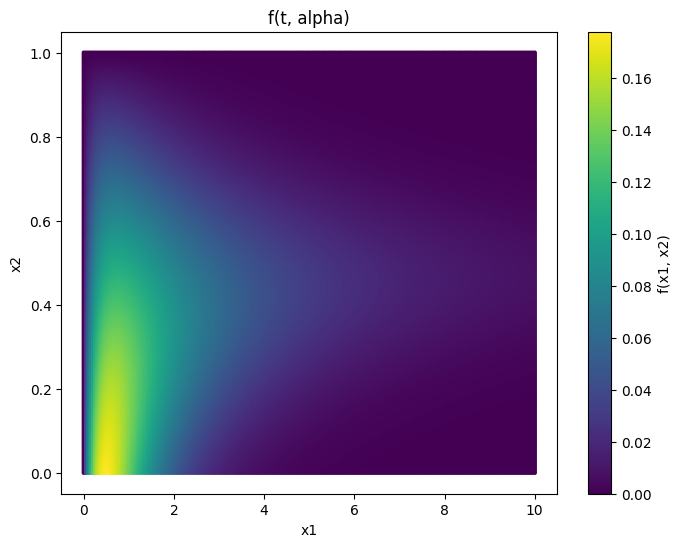

In [78]:
a_ = 0
b_ = 1
m_ = 1
n_ = 2

a1 = 0.0 # t lower
b1 = 10.0000000 # t upper
a2 = 0.0000000 # α lower
b2 = 1.0 # α upper

X_init, y_init
if distribution == 'grid':
    X_init, y_init = generate_data(funcI2C, [a1, a2], [b1, b2], num_samples, input_size)
else:
    X_init, y_init = generate_data_uniform(funcI2C, [a1, a2], [b1, b2], num_samples**2, input_size)

print("Inputs shape:", X_init.shape)
print("Targets shape:", y_init.shape)

plot_2d_function_heatmap(X_init, y_init, 'f(t, alpha)')

In [79]:
X, y = scale_data(X_init, y_init, n_dim=2) 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

model = MLP(input_size, hidden_size)
model.compile(criterion=nn.MSELoss(), optimizer=optim.Adam(model.parameters(), lr=learning_rate))
train_history = model.train(x_train, y_train, num_epochs, verbose=False)
test_loss = model.test(x_test, y_test)
print(f"Test Loss: {test_loss:.10f}")

nni_scaled = NeuralNumericalIntegration.integrate(model, [0, 0], [1, 1], n_dims=2)
nni_result = descale_result(float(nni_scaled[0]), X_init, y_init, frange=(0, 1), n_dim=2)
nni_scaled, nni_result

Training done! Time elapsed: 32.27 seconds
Test Loss: 0.0083073359
2D Integration started!


(array([mpf('0.15496867889353338')], dtype=object), 0.27522099018096924)

## $I[1, 0, 1, 2]$

Inputs shape: torch.Size([40000, 2])
Targets shape: torch.Size([40000, 1])


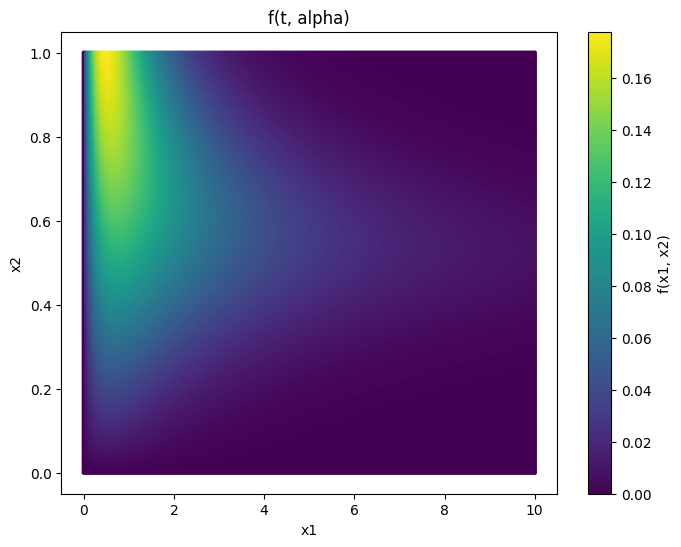

In [80]:
a_ = 1
b_ = 0
m_ = 1
n_ = 2

a1 = 0.0 # t lower
b1 = 10.0000000 # t upper
a2 = 0.0000000 # α lower
b2 = 1.0 # α upper

X_init, y_init
if distribution == 'grid':
    X_init, y_init = generate_data(funcI2C, [a1, a2], [b1, b2], num_samples, input_size)
else:
    X_init, y_init = generate_data_uniform(funcI2C, [a1, a2], [b1, b2], num_samples**2, input_size)

print("Inputs shape:", X_init.shape)
print("Targets shape:", y_init.shape)

plot_2d_function_heatmap(X_init, y_init, 'f(t, alpha)')

In [81]:
X, y = scale_data(X_init, y_init, n_dim=2) 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

model = MLP(input_size, hidden_size)
model.compile(criterion=nn.MSELoss(), optimizer=optim.Adam(model.parameters(), lr=learning_rate))
train_history = model.train(x_train, y_train, num_epochs, verbose=False)
test_loss = model.test(x_test, y_test)
print(f"Test Loss: {test_loss:.10f}")

nni_scaled = NeuralNumericalIntegration.integrate(model, [0, 0], [1, 1], n_dims=2)
nni_result = descale_result(float(nni_scaled[0]), X_init, y_init, frange=(0, 1), n_dim=2)
nni_scaled, nni_result

Training done! Time elapsed: 34.13 seconds
Test Loss: 0.0050162845
2D Integration started!


(array([mpf('0.15519830941179746')], dtype=object), 0.27562880516052246)

## $I[1, 1, 1, 2]$

Inputs shape: torch.Size([40000, 2])
Targets shape: torch.Size([40000, 1])


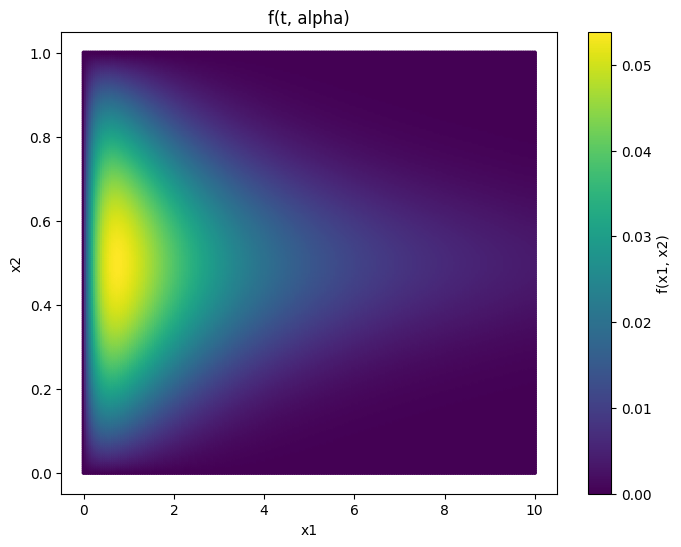

In [82]:
a_ = 1
b_ = 1
m_ = 1
n_ = 2

a1 = 0.0 # t lower
b1 = 10.0000000 # t upper
a2 = 0.0000000 # α lower
b2 = 1.0 # α upper

X_init, y_init
if distribution == 'grid':
    X_init, y_init = generate_data(funcI2C, [a1, a2], [b1, b2], num_samples, input_size)
else:
    X_init, y_init = generate_data_uniform(funcI2C, [a1, a2], [b1, b2], num_samples**2, input_size)

print("Inputs shape:", X_init.shape)
print("Targets shape:", y_init.shape)

plot_2d_function_heatmap(X_init, y_init, 'f(t, alpha)')

In [83]:
X, y = scale_data(X_init, y_init, n_dim=2) 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

model = MLP(input_size, hidden_size)
model.compile(criterion=nn.MSELoss(), optimizer=optim.Adam(model.parameters(), lr=learning_rate))
train_history = model.train(x_train, y_train, num_epochs, verbose=False)
test_loss = model.test(x_test, y_test)
print(f"Test Loss: {test_loss:.10f}")

nni_scaled = NeuralNumericalIntegration.integrate(model, [0, 0], [1, 1], n_dims=2)
nni_result = descale_result(float(nni_scaled[0]), X_init, y_init, frange=(0, 1), n_dim=2)
nni_scaled, nni_result

Training done! Time elapsed: 32.46 seconds
Test Loss: 0.0067161010
2D Integration started!


(array([mpf('0.1942226073038989')], dtype=object), 0.1046062782406807)

## $I[0, 0, 2, 3]$

Inputs shape: torch.Size([40000, 2])
Targets shape: torch.Size([40000, 1])


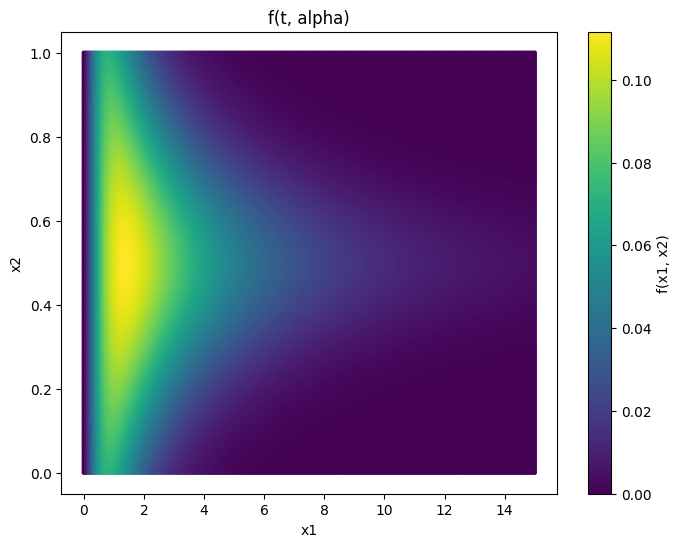

In [84]:
a_ = 0
b_ = 0
m_ = 2
n_ = 3

a1 = 0.0 # t lower
b1 = 15.0000000 # t upper
a2 = 0.0000000 # α lower
b2 = 1.0 # α upper

X_init, y_init
if distribution == 'grid':
    X_init, y_init = generate_data(funcI2C, [a1, a2], [b1, b2], num_samples, input_size)
else:
    X_init, y_init = generate_data_uniform(funcI2C, [a1, a2], [b1, b2], num_samples**2, input_size)

print("Inputs shape:", X_init.shape)
print("Targets shape:", y_init.shape)

plot_2d_function_heatmap(X_init, y_init, 'f(t, alpha)')

In [85]:
X, y = scale_data(X_init, y_init, n_dim=2) 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

model = MLP(input_size, hidden_size)
model.compile(criterion=nn.MSELoss(), optimizer=optim.Adam(model.parameters(), lr=learning_rate))
train_history = model.train(x_train, y_train, num_epochs, verbose=False)
test_loss = model.test(x_test, y_test)
print(f"Test Loss: {test_loss:.10f}")

nni_scaled = NeuralNumericalIntegration.integrate(model, [0, 0], [1, 1], n_dims=2)
nni_result = descale_result(float(nni_scaled[0]), X_init, y_init, frange=(0, 1), n_dim=2)
nni_scaled, nni_result

Training done! Time elapsed: 32.72 seconds
Test Loss: 0.0155249527
2D Integration started!


(array([mpf('0.20451117544731745')], dtype=object), 0.34235790371894836)

## $I[0, 1, 2, 3]$

Inputs shape: torch.Size([40000, 2])
Targets shape: torch.Size([40000, 1])


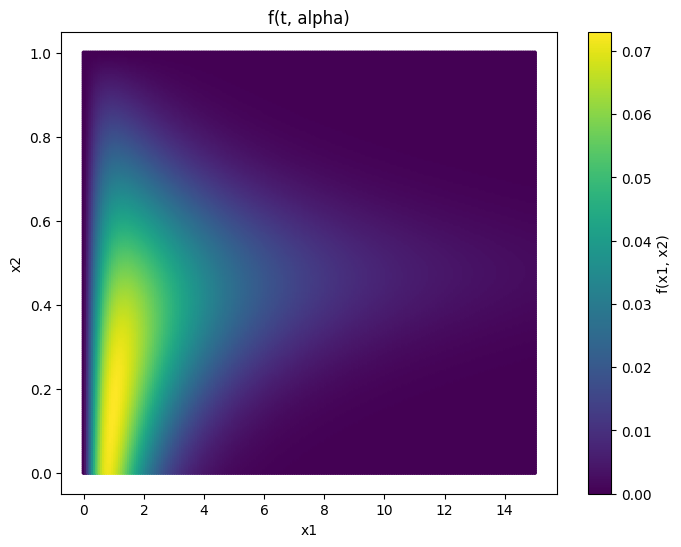

In [86]:
a_ = 0
b_ = 1
m_ = 2
n_ = 3

a1 = 0.0 # t lower
b1 = 15.0000000 # t upper
a2 = 0.0000000 # α lower
b2 = 1.0 # α upper

X_init, y_init
if distribution == 'grid':
    X_init, y_init = generate_data(funcI2C, [a1, a2], [b1, b2], num_samples, input_size)
else:
    X_init, y_init = generate_data_uniform(funcI2C, [a1, a2], [b1, b2], num_samples**2, input_size)

print("Inputs shape:", X_init.shape)
print("Targets shape:", y_init.shape)

plot_2d_function_heatmap(X_init, y_init, 'f(t, alpha)')

In [87]:
X, y = scale_data(X_init, y_init, n_dim=2) 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

model = MLP(input_size, hidden_size)
model.compile(criterion=nn.MSELoss(), optimizer=optim.Adam(model.parameters(), lr=learning_rate))
train_history = model.train(x_train, y_train, num_epochs, verbose=False)
test_loss = model.test(x_test, y_test)
print(f"Test Loss: {test_loss:.10f}")

nni_scaled = NeuralNumericalIntegration.integrate(model, [0, 0], [1, 1], n_dims=2)
nni_result = descale_result(float(nni_scaled[0]), X_init, y_init, frange=(0, 1), n_dim=2)
nni_scaled, nni_result

Training done! Time elapsed: 32.13 seconds
Test Loss: 0.0126590542
2D Integration started!


(array([mpf('0.15588840600021298')], dtype=object), 0.17077696323394775)

## $I[1, 0, 2, 3]$

Inputs shape: torch.Size([40000, 2])
Targets shape: torch.Size([40000, 1])


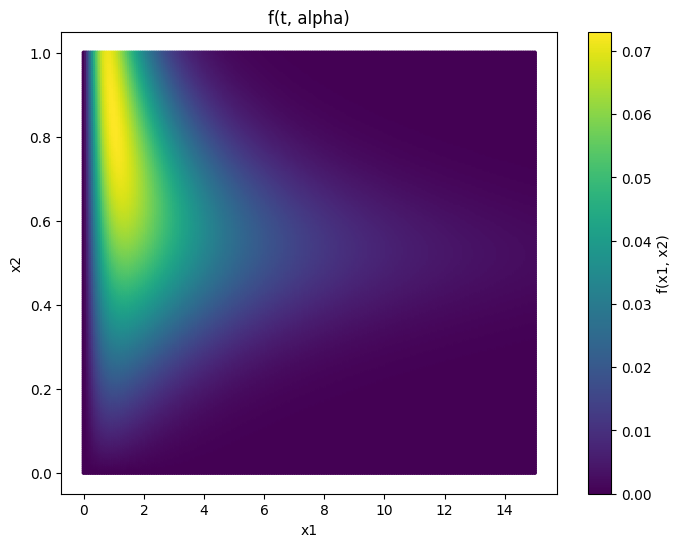

In [88]:
a_ = 1
b_ = 0
m_ = 2
n_ = 3

a1 = 0.0 # t lower
b1 = 15.0000000 # t upper
a2 = 0.0000000 # α lower
b2 = 1.0 # α upper

X_init, y_init
if distribution == 'grid':
    X_init, y_init = generate_data(funcI2C, [a1, a2], [b1, b2], num_samples, input_size)
else:
    X_init, y_init = generate_data_uniform(funcI2C, [a1, a2], [b1, b2], num_samples**2, input_size)

print("Inputs shape:", X_init.shape)
print("Targets shape:", y_init.shape)

plot_2d_function_heatmap(X_init, y_init, 'f(t, alpha)')

In [89]:
X, y = scale_data(X_init, y_init, n_dim=2) 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

model = MLP(input_size, hidden_size)
model.compile(criterion=nn.MSELoss(), optimizer=optim.Adam(model.parameters(), lr=learning_rate))
train_history = model.train(x_train, y_train, num_epochs, verbose=False)
test_loss = model.test(x_test, y_test)
print(f"Test Loss: {test_loss:.10f}")

nni_scaled = NeuralNumericalIntegration.integrate(model, [0, 0], [1, 1], n_dims=2)
nni_result = descale_result(float(nni_scaled[0]), X_init, y_init, frange=(0, 1), n_dim=2)
nni_scaled, nni_result

Training done! Time elapsed: 32.86 seconds
Test Loss: 0.0116330180
2D Integration started!


(array([mpf('0.15605359949725828')], dtype=object), 0.17095792293548584)

## $I[1, 1, 2, 3]$

Inputs shape: torch.Size([40000, 2])
Targets shape: torch.Size([40000, 1])


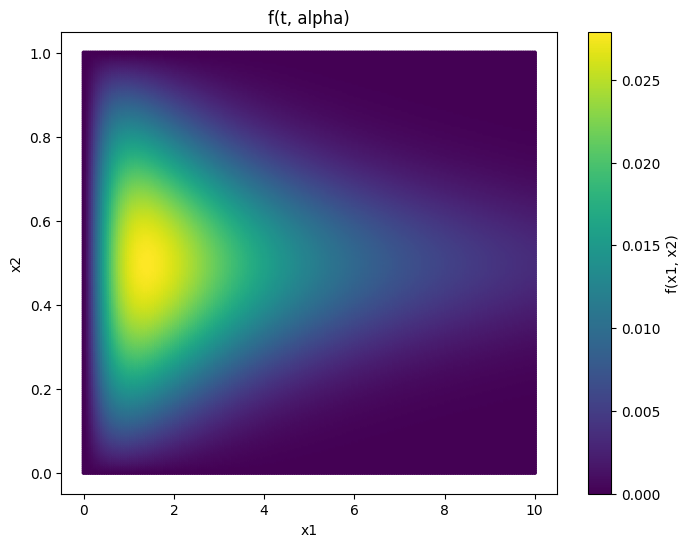

In [90]:
a_ = 1
b_ = 1
m_ = 2
n_ = 3

a1 = 0.0 # t lower
b1 = 10.0000000 # t upper
a2 = 0.0000000 # α lower
b2 = 1.0 # α upper

X_init, y_init
if distribution == 'grid':
    X_init, y_init = generate_data(funcI2C, [a1, a2], [b1, b2], num_samples, input_size)
else:
    X_init, y_init = generate_data_uniform(funcI2C, [a1, a2], [b1, b2], num_samples**2, input_size)

print("Inputs shape:", X_init.shape)
print("Targets shape:", y_init.shape)

plot_2d_function_heatmap(X_init, y_init, 'f(t, alpha)')

In [91]:
X, y = scale_data(X_init, y_init, n_dim=2) 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

model = MLP(input_size, hidden_size)
model.compile(criterion=nn.MSELoss(), optimizer=optim.Adam(model.parameters(), lr=learning_rate))
train_history = model.train(x_train, y_train, num_epochs, verbose=False)
test_loss = model.test(x_test, y_test)
print(f"Test Loss: {test_loss:.10f}")

nni_scaled = NeuralNumericalIntegration.integrate(model, [0, 0], [1, 1], n_dims=2)
nni_result = descale_result(float(nni_scaled[0]), X_init, y_init, frange=(0, 1), n_dim=2)
nni_scaled, nni_result

Training done! Time elapsed: 36.23 seconds
Test Loss: 0.0167630184
2D Integration started!


(array([mpf('0.23201162469536615')], dtype=object), 0.06473398208618164)